


好的！我将从零开始，详细推导策略梯度的数学过程，尽量分步骤解释每个环节。以下是推导过程：

---

### **策略梯度推导步骤**

#### **1. 目标函数定义**
强化学习的目标是找到一个策略 $\pi_\theta(a|s)$（参数为 $\theta$），最大化**期望累积回报**：
$$
J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^T \gamma^t r(s_t, a_t) \right]
$$
- $\tau = (s_0, a_0, r_0, s_1, a_1, r_1, \dots)$ 表示一条轨迹（Trajectory）。
- $\gamma \in [0,1]$ 是折扣因子。

---

#### **2. 轨迹概率分解**
一条轨迹 $\tau$ 出现的概率由策略和环境的动态共同决定：
$$
p(\tau|\theta) = p(s_0) \prod_{t=0}^T \pi_\theta(a_t|s_t) p(s_{t+1}|s_t, a_t)
$$
- $p(s_0)$ 是初始状态分布。
- $p(s_{t+1}|s_t, a_t)$ 是环境的状态转移概率。
- $\pi_\theta(a_t|s_t)$ 是策略选择的动作概率。

---

#### **3. 目标函数的期望展开**
将 $J(\theta)$ 展开为对所有可能轨迹的积分：
$$
J(\theta) = \int_\tau p(\tau|\theta) \left( \sum_{t=0}^T \gamma^t r(s_t, a_t) \right) d\tau
$$

---

#### **4. 计算梯度 $\nabla_\theta J(\theta)$**
为了最大化 $J(\theta)$，需要对 $\theta$ 求梯度：
$$
\nabla_\theta J(\theta) = \nabla_\theta \int_\tau p(\tau|\theta) R(\tau) d\tau
$$
其中 $R(\tau) = \sum_{t=0}^T \gamma^t r(s_t, a_t)$ 是轨迹 $\tau$ 的总回报。

---

#### **5. 交换梯度与积分（关键步骤）**
假设积分和梯度可交换（通常在合理条件下成立）：
$$
\nabla_\theta J(\theta) = \int_\tau \nabla_\theta p(\tau|\theta) R(\tau) d\tau
$$

---

#### **6. 引入对数梯度技巧**
利用对数导数性质 $\nabla_\theta p(\tau|\theta) = p(\tau|\theta) \nabla_\theta \log p(\tau|\theta)$，代入上式：
$$
\nabla_\theta J(\theta) = \int_\tau p(\tau|\theta) \nabla_\theta \log p(\tau|\theta) R(\tau) d\tau
$$
即：
$$
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \nabla_\theta \log p(\tau|\theta) R(\tau) \right]
$$

---

#### **7. 分解 $\log p(\tau|\theta)$**
根据轨迹概率公式：
$$
\log p(\tau|\theta) = \log p(s_0) + \sum_{t=0}^T \left[ \log \pi_\theta(a_t|s_t) + \log p(s_{t+1}|s_t, a_t) \right]
$$
对 $\theta$ 求梯度时，**环境动态 $\log p(s_{t+1}|s_t, a_t)$ 与 $\theta$ 无关**，因此：
$$
\nabla_\theta \log p(\tau|\theta) = \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t)
$$

---

#### **8. 代入梯度公式**
将分解后的梯度代入步骤6的结果：
$$
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \left( \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) \right) R(\tau) \right]
$$

---

#### **9. 时间步分解（关键改进）**
注意到**当前动作 $a_t$ 不影响过去的奖励**，因此可以将总回报 $R(\tau)$ 分解为从时刻 $t$ 开始的回报 $G_t = \sum_{k=t}^T \gamma^{k-t} r(s_k, a_k)$。于是梯度公式可重写为：
$$
\nabla_\theta J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) G_t \right]
$$

---

#### **10. 策略梯度定理**
进一步简化，假设状态服从稳态分布 $d^\pi(s)$，最终得到策略梯度定理的标准形式：
$$
\nabla_\theta J(\theta) = \mathbb{E}_{s \sim d^\pi, a \sim \pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) Q^\pi(s,a) \right]
$$
- $Q^\pi(s,a) = \mathbb{E} \left[ \sum_{k=0}^\infty \gamma^k r_{t+k} \mid s_t = s, a_t = a \right]$ 是动作值函数。

---

#### **11. 引入基线（Baseline）减少方差**
为了降低方差，可以在梯度中减去一个与动作无关的基线 $b(s)$（通常选择状态值函数 $V(s)$）：
$$
\nabla_\theta J(\theta) = \mathbb{E} \left[ \nabla_\theta \log \pi_\theta(a|s) \left( Q^\pi(s,a) - V^\pi(s) \right) \right]
$$
其中 $Q^\pi(s,a) - V^\pi(s)$ 称为**优势函数（Advantage Function）** $A^\pi(s,a)$。

---

### **最终梯度更新公式**
通过蒙特卡洛采样估计期望值，参数更新公式为：
$$
\theta \leftarrow \theta + \alpha \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) \left( G_t - b(s_t) \right)
$$
- $\alpha$ 是学习率。
- 若使用 $b(s_t) = V^\pi(s_t)$，则为Actor-Critic算法。

---

### **关键点总结**
1. **核心技巧**：利用 $\nabla_\theta \log p(\tau|\theta)$ 将梯度转换为策略对数概率的梯度加权求和。
2. **方差缩减**：基线（Baseline）的选择不影响梯度无偏性，但能显著降低方差。
3. **适用范围**：策略梯度直接优化策略，适用于连续动作空间和随机策略。

希望这个分步推导能帮助你理解！如果有具体步骤不清楚，可以告诉我，我再补充解释。

In [3]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import rl_utils

In [4]:
class PolicyNet(torch.nn.Module):
    """
    输入是某个状态, 输出是该状态下的动作概率分布
    """
    def __init__(self, state_dim, hidden_dim, action_dim):
        super(PolicyNet, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, action_dim)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        return F.softmax(self.fc2(x),dim=1)  #实现动作分布(离散动作空间)

In [5]:
class reinforce:
    def __init__(self, state_dim, hidden_dim, action_dim, learning_rate, gamma, device):
        self.policyNet = PolicyNet(state_dim, hidden_dim, action_dim).to(device)
        self.optimizer = torch.optim.Adam(self.policyNet.parameters(),lr=learning_rate)
        self.gamma = gamma
        self.device = device

    def take_action(self, state): 
        state = torch.tensor([state],dtype=torch.float).to(self.device) #[1, action_dim]
        action_probs = self.policyNet(state) #[1, action_dim]
        action_dist = torch.distributions.Categorical(action_probs)
        action = action_dist.sample() #按概率采样
        return action.item()
    
    def update(self, transition_dict):
        #轨迹
        reward_list = transition_dict['rewards']
        state_list = transition_dict['states']
        action_list = transition_dict['actions']

        G = 0
        self.optimizer.zero_grad()
        for i in reversed(range(len(reward_list))):
            reward = reward_list[i]
            state = torch.tensor([state_list[i]],dtype=torch.float).to(self.device)
            action = torch.tensor([action_list[i]]).view(-1,1).to(self.device)
            log_prob = torch.log(self.policyNet(state).gather(1, action))
            G = self.gamma * G + reward
            loss = -log_prob * G #最大化 log_prob * G
            loss.backward()


        self.optimizer.step()

In [6]:
learning_rate = 1e-3  
num_episodes = 1800  #环境部署更多, 需要更多时间收敛
hidden_dim = 128
gamma = 0.99
device = torch.device("cuda") 

env_name = "CartPole-v1"
env = gym.make(env_name)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = reinforce(state_dim, hidden_dim, action_dim, learning_rate, gamma, device)

return_list = []
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i ) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            episode_return = 0
            transition_dict = {
                'states': [],
                'actions': [],
                'next_states': [],
                'rewards': [],
                'dones': []
            }
            state, _ = env.reset(seed=0)
            done = False
            while not done:
                action = agent.take_action(state)
                next_state, reward, terminated, truncated, _ = env.step(action) 
                done = terminated or truncated
                transition_dict['states'].append(state)
                transition_dict['actions'].append(action)
                transition_dict['next_states'].append(next_state)
                transition_dict['rewards'].append(reward)
                transition_dict['dones'].append(done)
                state = next_state
                episode_return += reward
            return_list.append(episode_return)
            agent.update(transition_dict)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)


Iteration 0:   0%|          | 0/180 [00:00<?, ?it/s]C:\Users\10546\AppData\Local\Temp\ipykernel_9268\631278951.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  state = torch.tensor([state],dtype=torch.float).to(self.device) #[1, action_dim]
Iteration 9: 100%|██████████| 180/180 [03:11<00:00,  1.07s/it, episode=1800, return=500.000]


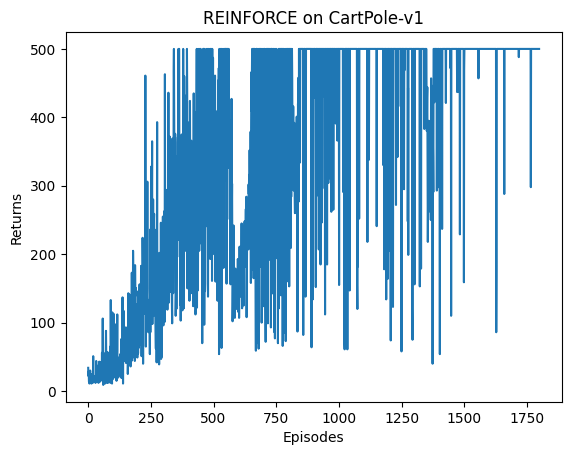

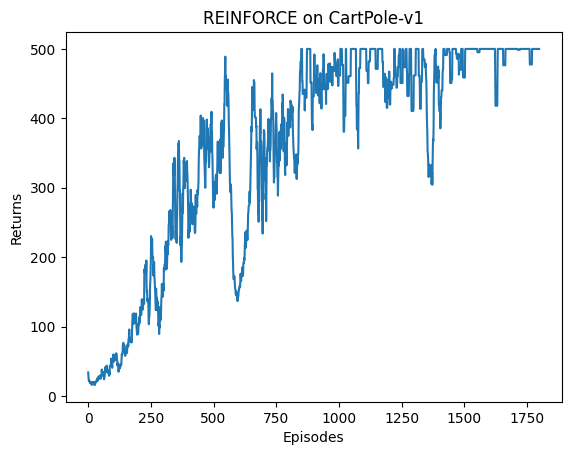

In [7]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()

mv_return = rl_utils.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('REINFORCE on {}'.format(env_name))
plt.show()
#可以看到方差非常大

### 尝试总结今天所学

今天学习了强化学习的另一分支, **policy-based method**.   
这主要涉及将策略参数化, 用一个神经网络对策略建模, 输入为某状态, 输出为动作的概率分布. 通过蒙特卡罗方法估计动作价值. 相比于Q-learing, 这是对策略建模, 而不是对Q_function 建模.   
在训练过程中,我们得到的是动作的状态访问分布. 通过策略网络对动作分布进行优化.    
通俗的说: 当我们要得到一个策略时, 需要进行多次的尝试(采样),在采样的过程中, 我们可以得到基于多次采样的动作分布概率. 当一个动作得到好的reward时, 就改变动作分布概率,使之趋向reward大的动作. 

### 查漏补缺与系统化总结
---
#### **1. 策略梯度方法的核心思想**
- **核心目标**：直接优化策略函数 $\pi_\theta(a|s)$，通过调整参数 $\theta$ 使策略选择的动作能最大化**期望累积回报**。
- **与Q-learning的区别**：
  | **Q-learning (Value-Based)**          | **Policy Gradient (Policy-Based)**       |
  |----------------------------------------|------------------------------------------|
  | 间接优化Q函数，通过Q值选择动作         | 直接优化策略函数，输出动作概率分布       |
  | 适用于离散动作空间                     | 天然支持**连续动作空间**（如高斯分布输出）|
  | 存在最大化偏差（Maximization Bias）问题 | 无此问题，直接按概率分布探索             |

---

#### **2. 策略网络的结构**
- **输入**：状态 $s$（如游戏画面、传感器数据）。
- **输出**：动作概率分布 $\pi_\theta(a|s)$，通常通过 **Softmax**（离散动作）或 **高斯分布参数**（连续动作）实现。

---
#### **3. 策略梯度定理与梯度计算**
- **目标函数**：$J(\theta) = \mathbb{E}_{\tau \sim \pi_\theta} \left[ \sum_{t=0}^T \gamma^t r_t \right]$。
- **策略梯度定理**：
  $$
  \nabla_\theta J(\theta) = \mathbb{E}_{s \sim d^\pi, a \sim \pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot Q^\pi(s,a) \right]
  $$
  - $d^\pi(s)$ 是策略 $\pi_\theta$ 下的状态分布。
  - $Q^\pi(s,a)$ 是动作价值函数。

- **蒙特卡洛近似**：用轨迹采样估计期望值：
  $$
  \nabla_\theta J(\theta) \approx \frac{1}{N} \sum_{i=1}^N \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t^i|s_t^i) \cdot G_t^i
  $$
  - $G_t^i = \sum_{k=t}^T \gamma^{k-t} r_k^i$ 是从时刻 $t$ 开始的折扣回报。
---
#### **4. 关键改进：引入基线（Baseline）**
- **问题**：直接使用 $G_t$ 作为权重会导致高方差。
- **解决方案**：引入基线函数 $b(s)$（通常为状态值函数 $V(s)$）：
  $$
  \nabla_\theta J(\theta) = \mathbb{E} \left[ \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot \underbrace{(Q^\pi(s_t,a_t) - V^\pi(s_t))}_{\text{优势函数 } A^\pi(s_t,a_t)} \right]
  $$
  - **优势函数** $A^\pi(s,a)$ 衡量动作 $a$ 相对于平均水平的优势，降低方差。
---
#### **5. 算法流程（以REINFORCE为例）**
1. **采样轨迹**：用当前策略 $\pi_\theta$ 与环境交互，收集轨迹 $\tau = (s_0,a_0,r_0, s_1,a_1,r_1, \dots)$。
2. **计算回报**：对每个时间步 $t$，计算 $G_t = \sum_{k=t}^T \gamma^{k-t} r_k$。
3. **估计梯度**：计算 $\nabla_\theta J(\theta) \approx \sum_{t=0}^T \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot G_t$。
4. **更新参数**：$\theta \leftarrow \theta + \alpha \nabla_\theta J(\theta)$。
---
#### **7. 策略梯度方法的优缺点**
- **优点**：
  - 直接优化策略，适用于连续和高维动作空间。
  - 可自然处理随机策略（如探索与利用的平衡）。
- **缺点**：
  - 高方差（需用基线、Actor-Critic等方法缓解）。
  - 通常是 **On-Policy**，数据利用率低（需大量采样）。


In [8]:
#附录, 展示state被处理的过程
import torch
import torch.nn.functional as F

# 假设策略网络的输出
probs = torch.tensor([[0.5, 0.3, 0.2]])

# 创建Categorical分布对象
action_dist = torch.distributions.Categorical(probs)

# 随机采样动作
action = action_dist.sample()
print(f"Sampled action: {action.item()}")  # 可能输出：0、1 或 2

# 计算采样动作的对数概率
log_prob = action_dist.log_prob(action)
print(f"Log probability of the sampled action: {log_prob.item()}")

# 计算分布的熵
entropy = action_dist.entropy()
print(f"Entropy of the distribution: {entropy.item()}")

Sampled action: 0
Log probability of the sampled action: -0.6931471824645996
Entropy of the distribution: 1.0296530723571777
